In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [108]:
# Function to check for missing data
def checkMissingData():
    df = pd.read_csv('DataFolder/data.csv')
    print(df.info())
    
checkMissingData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [109]:
# Function to handle missing data
def missingDataHandler():
    df = pd.read_csv('DataFolder/data.csv')
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') # Replace missing values with the mean of the column
    missingColumns = ['Daily tests', 'Cases', 'Deaths']
    for column in missingColumns:
        df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1))
    print(df.info())
    return df
    
dataFrame = missingDataHandler()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [110]:
# Add new columns to the dataframe
def addNewColumns(entity, df = dataFrame):
    df = df[df.iloc[:, 0] == entity]
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    df['Daily Cases'] = abs(df['Cases'].diff())
    df['Daily Cases'] = imputer.fit_transform(df['Daily Cases'].values.reshape(-1, 1))
    df['Positivity rate'] = df['Daily Cases'] / df['Daily tests']
    df['Positivity rate'] *= 100
    df['Mortality rate'] = df['Deaths'].values / df['Cases'].values
    return df

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

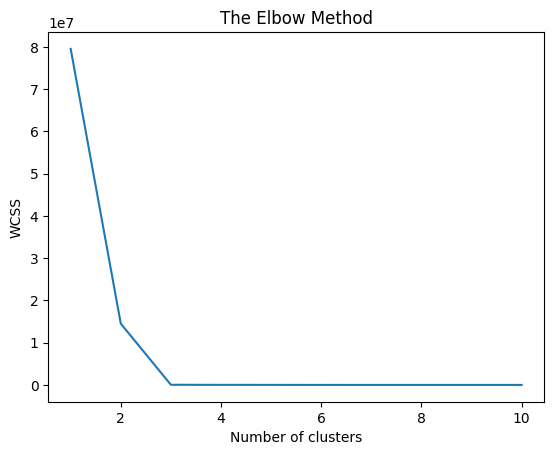

In [111]:
# Function to plot the elbow method
def elbowMethod():
    dataFrame = pd.read_csv('DataFolder/data.csv')
    entities = dataFrame.iloc[:, 0].unique()
    for entity in entities:
        df = addNewColumns(entity)
    # Get the positivity rate and mortality rate columns
    X = df.iloc[:, -2:].values
    wcss = [] # Within cluster sum of squares (WCSS) is the sum of squares of the distances of each data point in all clusters to their respective centroids
    for i in range(1, 11): # 1 to 10 clusters
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm
        # random_state is the seed used by the random number generator
        kmeans.fit(X)
        wcss.append(kmeans.inertia_) # inertia_ is the sum of squared distances of samples to their closest cluster center
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return X
    
indVar = elbowMethod()

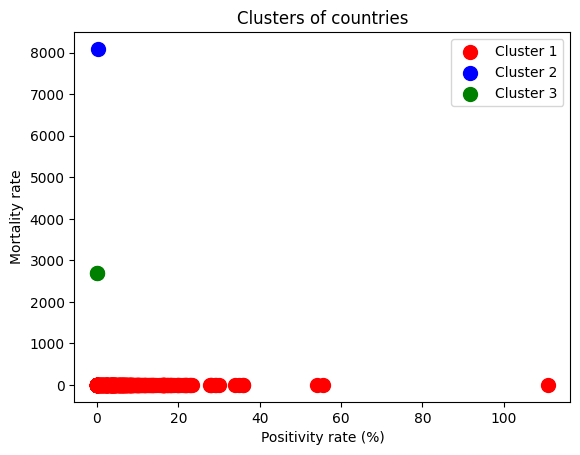

In [112]:
# Function to plot the clusters
def clustering(var):
    # From the elbow method we can see that the optimal number of clusters is 3
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(var)
    plt.scatter(var[y_kmeans == 0, 0], var[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(var[y_kmeans == 1, 0], var[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(var[y_kmeans == 2, 0], var[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.title('Clusters of countries')
    plt.xlabel('Positivity rate (%)')
    plt.ylabel('Mortality rate')
    plt.legend()
    plt.show()
    
clustering(indVar)

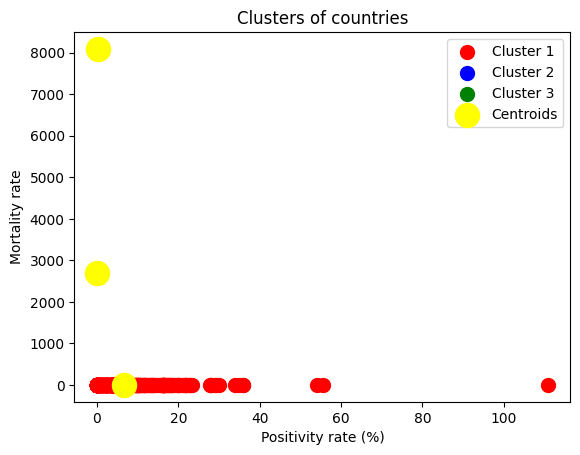

In [113]:
# Function to plot the clusters with centroids
def clusteringCentr(var):
    # From the elbow method we can see that the optimal number of clusters is 3
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(var)
    plt.scatter(var[y_kmeans == 0, 0], var[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(var[y_kmeans == 1, 0], var[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(var[y_kmeans == 2, 0], var[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of countries')
    plt.xlabel('Positivity rate (%)')
    plt.ylabel('Mortality rate')
    plt.legend()
    plt.show()
    
clusteringCentr(indVar)